In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs((-1,-1), frameon = False, loc = 'upper right', fontsize = 12)
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Galaxies by Particle', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
lowbin = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^8$'
midbin =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$ $<$ 10$^9$'
highbin = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
bins = ['low-bin', 'mid-bin', 'high-bin']
threshs = ['low-threshold', 'mid-threshold', 'high-threshold']
ds.displayAs('HI_res', bins, [lowbin, midbin, highbin])
ds.setOrder('HI_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('copper', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('HI_res', bins[i], {'color':colors[i]})
    ds.plotArgs('HI_res', threshs[i], {'color':colors[i]})
ds.plotArgs('HI_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'10$^7 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
midth =r'10$^8 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('HI_res', threshs, [lowth, midth, highth])

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


In [3]:
lowbin = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^9$'
midbin =r'10$^9 \leq$ M$_{\star}$/M$_\odot$ $<$ 10$^{10}$'
highbin = r'10$^{10} \leq$ M$_{\star}$/M$_\odot$'
ds.displayAs('gal_res', bins, [lowbin, midbin, highbin])
ds.setOrder('gal_res', bins + threshs + ['diemer'])
colors = seaborn.color_palette('viridis', len(bins) + 1)
colors.reverse()
for i in range(len(bins)):
    ds.plotArgs('gal_res', bins[i], {'color':colors[i]})
    ds.plotArgs('gal_res', threshs[i], {'color':colors[i]})
ds.plotArgs('gal_res', 'diemer', {'color':colors[-1], 'label':'No Cut'})

lowth = r'2 $\times$ 10$^8 \leq$ M$_{\star}$/M$_\odot$'
midth =r'10$^9 \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
highth = r'10$^{10} \leq$ M$_{\mathrm{HI}}$/M$_\odot$'
ds.displayAs('gal_res', threshs, [lowth, midth, highth])

In [4]:
def makeBlueRedRatio(datalist):
    from figrid.data_container import DataContainer
    ip = {'color':'blue', 'color_cut':'0.60', 'path':['galbt'], 'post_process':'no key found'}
    blues = datalist.getMatching(ip)
    ratiolist = []
    for dc in blues:
        mattr = copy.deepcopy(dc.attrs)
        rmattr = []
        for k in mattr:
            if 'runtime' in k or 'color' == k:
                rmattr.append(k)
        for rm in rmattr:
            del mattr[rm]
        mattr['color'] = 'red'
        reds = datalist.getMatching(mattr)
        if len(reds) > 1:
            print('%d corresponding reds for a blue:'%len(reds))
            print("BLUE ATTRS:")
            print(dc.attrs)
            print("RED ATTRS:")
            for r in reds:
                print(r.attrs)
        if len(reds) == 0:
            print('no reds found')
            print(dc.attrs)
        else:
            reds = reds[0]
            data = [dc.data[0], reds.data[1]/dc.data[1]]
            ratio = DataContainer(data)
            mattr['color'] = 'ratio' 
            ratio.update(mattr)
            ratiolist.append(ratio)
    return ratiolist

In [5]:
galbt_ratio = makeBlueRedRatio(ds)

In [6]:
ds.extend(galbt_ratio)

In [7]:
ds.loadHdf5('/home/cosinga/population_hists.hdf5')

# HI auto bins

In [8]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.plotArgs('diemer', {'label':'No Cut'})
fg.autoFill({'alpha':0.8})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5, 1e4)})
fg.legendArgs({'fontsize':11}, (0, 0))
fg.plot()
# fg.save('HI-bins_auto_snapshot_space.png')

The row values for snapshot: [99, 67]
The column values for : ['no key found']


AttributeError: 'DataSort' object has no attribute 'gspec_args'

# Making HI-bins figure for paper

Excluding the z=0.5 snapshot since it's mostly redundant. Also adding the HI/stmass histograms

In [ ]:
%%capture
def mask_zeros(axis, data, kwargs):
    zeromask = data[1] > 0
    axis.fill_between(data[0][zeromask], data[1][zeromask], data[2][zeromask], **kwargs)
    return

ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'snapshot':99}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.plotArgs('diemer', {'label':'No Cut'})
fg.autoFill()

ip = {'is_hist':True, 'fieldname':'hisubhalo', 'is_hydrogen':True}
hifg = ds.figrid('model', '', '', ip)
hifg.fill(ip, {'color':'brown', 'alpha':0.8, 'label':'D18 HI Models'})
hifg.setFunc({'figrid_process':'fill'}, mask_zeros)

# ip['is_hydrogen'] = [False, 'False']
# ip['color'] = ['resolved', 'no key found']
# ip['censat'] = 'both'
# del ip['fieldname']
# stfg = ds.figrid('fieldname', '', '', ip)

ds.combineFigrids(fg, hifg, 'right', spacing = 0.5)
# ds.combineFigrids(fg, stfg, 'right', spacing = 0.05)

In [ ]:
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB, pos = [(fg.panel_widths[0]*0.5 + fg.xborder[0])/fg.figsize[0], 0])
pk = (0,0)
HI = (0,1)
fg.axisArgs({'ylim':(5, 1.5e4)}, slc = pk)
fg.axisArgs({'xlim':(1e6, 1e11), 'ylim':(1e10, 1e14)}, slc = HI)
fg.legendArgs({'fontsize':11}, (0, slice(None)))
fg.annotateFig(r"$\int_{\mathrm{bin}}$ N(M$_{\rm{HI}}$) M$_{\rm{HI}}$ dM$_{\rm{HI}}$",
              [(fg.panel_widths[0] + fg.wspace[0] * 0.5 + fg.xborder[0]) / fg.figsize[0],
                    (0.5 * (fg.figsize[1] - np.sum(fg.yborder)) + fg.yborder[1])/fg.figsize[1]],
               {'fontsize':16, 'ha':'center', 'va':'center', 'rotation':'vertical'}
              )
fg.annotateFig(r"M$_{\mathrm{HI}}$ (M$_\odot$)", [1 - (fg.xborder[1] + 0.5*fg.panel_widths[1])/fg.figsize[0], 0],
              {'fontsize':16, 'ha':'center', 'va':'bottom'})
fg.plot()
# fg.save(DRAFTPATH + 'HI_auto_bins_histogram.pdf')
# fg.save('HI_auto_bins_histogram.png')
fg.fig

In [ ]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.autoNorm('diemer', ['model'])
fg.setYLabel(r"P$_{\mathrm{Bin}}$(k) / P$_{\mathrm{Total}}$(k)")
fg.setXLabel(XLAB)
fg.autoFill({'alpha':0.6})
fg.plotArgs('diemer', {'visible':False})
fg.axisArgs({'ylim':(.1, 10)})
fg.legendArgs({'fontsize':11}, (0,0))
fg.plotOnes()
fg.plot()
fg.save('HI-bins_ratios_auto_snapshot_space.png')

# HI thresholds auto power

In [ ]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'snapshot', '', ip)
fg.plotArgs('diemer', {'label':'No Cuts'})
fg.autoFill({'alpha':0.6})
fg.setYLabel(YLAB%r"\mathrm{HI}")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5, 1e4)})
fg.legendArgs({}, (-1,-1))
fg.plot()
fg.save('HI-thresholds_auto_snapshot_space.png')

In [ ]:
ip = {'fieldname':'hisubhalo', 'HI_res':['diemer', 'low-threshold', 'mid-threshold', 'high-threshold'],
     'is_auto':True, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':['real', 'redshift'],
     'grid_resolution':800, 'path':['fiducial', 'HIbt']}
fg = ds.figrid('HI_res', 'space', 'snapshot', ip)
fg.autoNorm('diemer', ['model'])

fg.autoFill({'alpha':0.6})
fg.setYLabel("P$_{\mathrm{thresh}}$ (k)/P$_{\mathrm{HI}}$ (k)")
fg.setXLabel(XLAB)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(.1,10)})
fg.legendArgs({'loc':'lower left'}, (-1,-1))
fg.plot()
fg.save('HI-thresholds_ratio_auto_snapshot_space.png')


# HI-Galaxy Cross Power Bins

In [ ]:
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['blue', 'red', 'resolved'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('HI_res', 'color', 'snapshot', ip)
fg.legendArgs({'loc':'lower left'}, (1, 1))
fg.autoFill()
fg.plot()

In [ ]:
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['blue', 'red'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('color', 'snapshot', 'HI_res', ip)
# fg.legendArgs({'loc':'lower left'}, (1, 1))
fg.autoFill()
fg.plot()

The row values for color: ['blue', 'red']
The column values for HI_res: ['diemer', 'low-bin', 'mid-bin', 'high-bin']


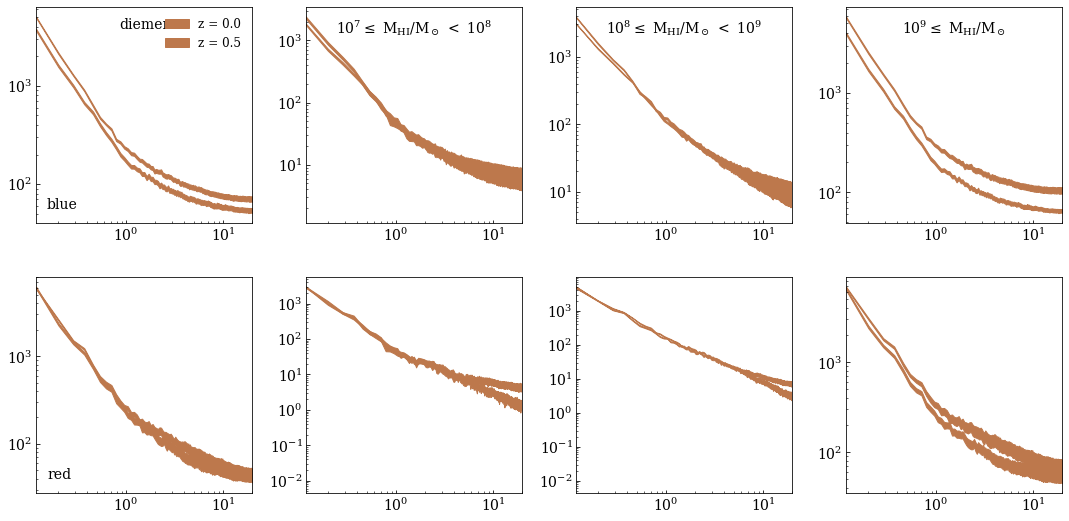

In [33]:
ip = {'HI_fieldname':'hisubhalo', 'HI_res':['diemer', 'low-bin', 'mid-bin', 'high-bin'],
     'is_auto':False, 'censat':['no key found', None, 'both'], 'sim_resolution':'high', 'space':'real',
     'grid_resolution':800, 'path':['fiducial', 'HIbt'], 'gal_res':'diemer', 'color':['blue', 'red'],
     'color_cut':['0.60', 'None'], 'post_process':'no key found'}
fg = ds.figrid('snapshot', 'color', 'HI_res', ip)
# fg.legendArgs({'loc':'lower left'}, (1, 1))
fg.autoFill()
fg.plotArgs(99, color = 'black')
fg.plotArgs(67, color = 'blue')
fg.plot()

# hisubhalo-galaxy color figure

The row values for snapshot: [99, 67]
The column values for : ['no key found']


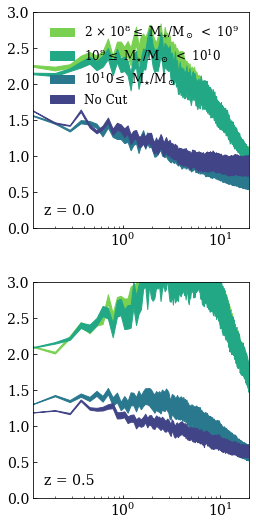

In [31]:
ip = {'color':'ratio', 'path':['galbt', 'fiducial'], 'is_auto':False, 'censat':['both', 'no key found'], 'space':'real',
     'gal_res':['diemer', 'high-bin', 'mid-bin', 'low-bin'], 'post_process':'no key found', 'HI_fieldname':'hisubhalo'}

fg = ds.figrid('gal_res', 'snapshot', '', ip)
fg.autoFill()
fg.axisArgs({'yscale':'linear', 'ylim':(0,3)})
fg.plot()

In [29]:
pan = fg.panels[0,0]
for dc in pan:
    if dc.get('gal_res') == 'diemer':
        print(dc.attrs)
        print()


{'path': 'fiducial', 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_groupcat': True, 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'model': 'm_hi_GD14_map', 'projection': 'map', 'HI_res': 'diemer', 'HI_fieldname': 'hisubhalo', 'color': 'ratio'}

{'path': 'fiducial', 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'hisubhalo_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': False, 'is_grou

In [22]:
ds.getAttrVals('gal_res')

['no key found',
 'diemer',
 'None',
 'high-bin',
 'high-threshold',
 'low-bin',
 'low-threshold',
 'mid-bin',
 'mid-threshold',
 'tng100-2',
 'tng300']